# Parametric Density Estimation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

(array([ 10.,  45., 102., 204., 241., 226., 117.,  39.,  12.,   4.]),
 array([35.75342984, 38.91585938, 42.07828891, 45.24071844, 48.40314798,
        51.56557751, 54.72800705, 57.89043658, 61.05286611, 64.21529565,
        67.37772518]),
 <BarContainer object of 10 artists>)

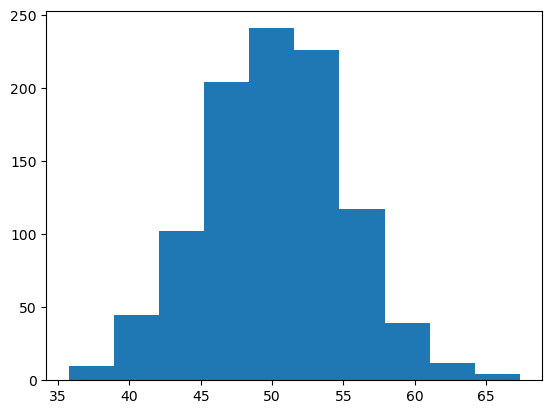

In [2]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [3]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [4]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [5]:
values = np.linspace(sample.min(),sample.max(),100)

In [6]:
probabilities = [dist.pdf(value) for value in values]

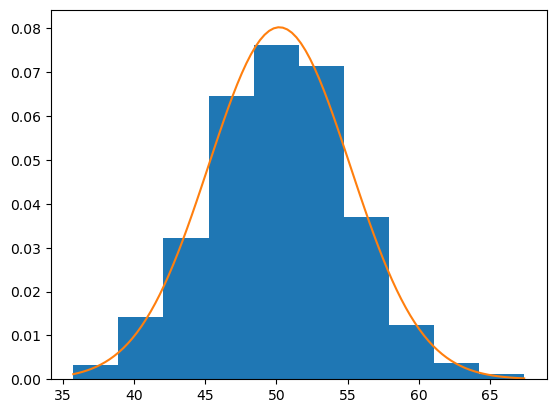

In [7]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

C:\Users\Sachin\AppData\Local\Temp\ipykernel_41736\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

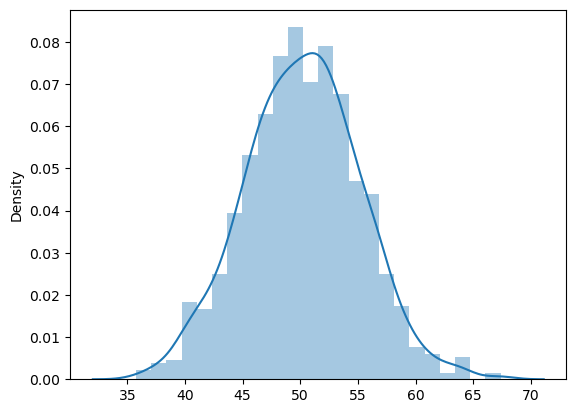

In [8]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [9]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  4.,  3.,  9.,  7.,  5., 19.,
        28., 12., 30., 27., 40., 21., 19., 26., 12., 17., 16., 16., 12.,
         6., 22., 22., 27., 34., 41., 59., 57., 56., 69., 57., 57., 36.,
        42., 30., 26.,  5., 15.,  6.,  4.,  1.,  1.,  1.,  1.]),
 array([ 1.30936775,  2.41370479,  3.51804184,  4.62237889,  5.72671593,
         6.83105298,  7.93539003,  9.03972707, 10.14406412, 11.24840116,
        12.35273821, 13.45707526, 14.5614123 , 15.66574935, 16.77008639,
        17.87442344, 18.97876049, 20.08309753, 21.18743458, 22.29177163,
        23.39610867, 24.50044572, 25.60478276, 26.70911981, 27.81345686,
        28.9177939 , 30.02213095, 31.12646799, 32.23080504, 33.33514209,
        34.43947913, 35.54381618, 36.64815323, 37.75249027, 38.85682732,
        39.96116436, 41.06550141, 42.16983846, 43.2741755 , 44.37851255,
        45.48284959, 46.58718664, 47.69152369, 48.79586073, 49.90019778,
        51.00453483, 52.10887187, 53.21320892, 54.31754596,

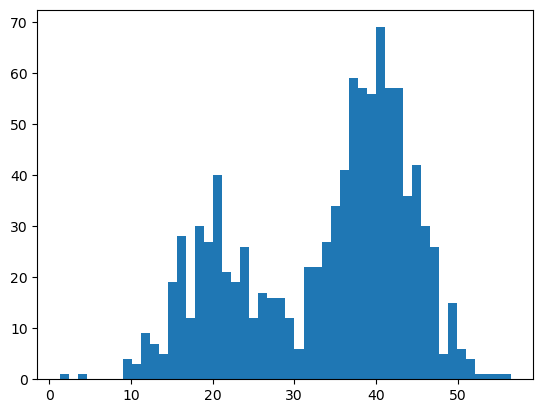

In [10]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [11]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [12]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [13]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

In [ ]:
# score_samples(values) returns the log-density estimate of the input samples values.
# This is because the score_samples() method of the KernelDensity class returns the logarithm of the probability density estimate
# rather than the actual probability density estimate.

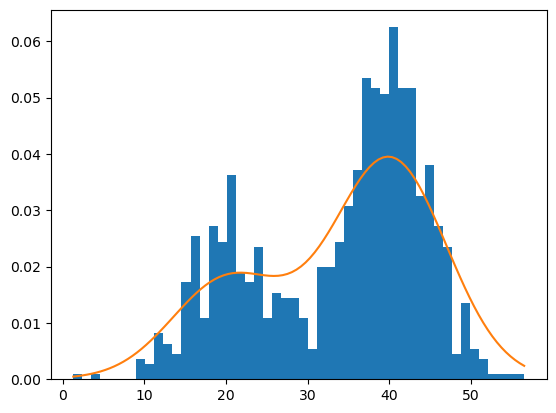

In [14]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()